In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime, timedelta
import xlrd

In [2]:
from google.colab import drive
drive.mount('/content/drive')
%cd drive/MyDrive/Skripsi Abdul Hakim/piton skripsi

Mounted at /content/drive
/content/drive/MyDrive/Skripsi Abdul Hakim/piton skripsi


In [3]:
file_name = "rimba_panjang.pkl"
data = pd.read_pickle(file_name)
data

,TANGGAL,JAM,KODE,LOKASI,PRO,KAB,KEC,LON,LAT,HUJAN,SOIL,GWL
0,2019-07-30 18:00:00,18,BRG_140103_01,RIMBA PANJANG,RIAU,KAMPAR,TAMBANG,101.298816,0.434982,0.0,57.440,-0.232
1,2019-07-30 19:00:00,19,BRG_140103_01,RIMBA PANJANG,RIAU,KAMPAR,TAMBANG,101.298816,0.434982,1.8,57.876,-0.233
2,2019-07-31 01:00:00,1,BRG_140103_01,RIMBA PANJANG,RIAU,KAMPAR,TAMBANG,101.298816,0.434982,0.2,57.535,-0.221
3,2019-07-31 02:00:00,2,BRG_140103_01,RIMBA PANJANG,RIAU,KAMPAR,TAMBANG,101.298816,0.434982,0.2,56.881,-0.230
4,2019-07-31 03:00:00,3,BRG_140103_01,RIMBA PANJANG,RIAU,KAMPAR,TAMBANG,101.298816,0.434982,0.0,56.277,-0.231
...,...,...,...,...,...,...,...,...,...,...,...,...
15973,2021-10-09 21:00:00,21,BRG_140103_01,RIMBA PANJANG,RIAU,KAMPAR,TAMBANG,101.298816,0.434982,1.0,46.070,-0.287
15974,2021-10-09 22:00:00,22,BRG_140103_01,RIMBA PANJANG,RIAU,KAMPAR,TAMBANG,101.298816,0.434982,6.6,45.610,-0.316
15975,2021-10-09 23:00:00,23,BRG_140103_01,RIMBA PANJANG,RIAU,KAMPAR,TAMBANG,101.298816,0.434982,3.2,46.009,-0.310
15976,2021-10-10 00:00:00,0,BRG_140103_01,RIMBA PANJANG,RIAU,KAMPAR,TAMBANG,101.298816,0.434982,2.8,46.285,-0.304


In [4]:
data = data.drop(['JAM', 'KODE', 'LOKASI', 'PRO', 'KAB', 'KEC', 'LON', 'LAT'], axis=1)
data = data[['TANGGAL', 'GWL', 'SOIL', 'HUJAN']]
data.rename(columns={'TANGGAL': 'date', 'GWL': 'gwl', 'SOIL': 'soil', 'HUJAN': 'rain'}, inplace=True)
data

,date,gwl,soil,rain
0,2019-07-30 18:00:00,-0.232,57.440,0.0
1,2019-07-30 19:00:00,-0.233,57.876,1.8
2,2019-07-31 01:00:00,-0.221,57.535,0.2
3,2019-07-31 02:00:00,-0.230,56.881,0.2
4,2019-07-31 03:00:00,-0.231,56.277,0.0
...,...,...,...,...
15973,2021-10-09 21:00:00,-0.287,46.070,1.0
15974,2021-10-09 22:00:00,-0.316,45.610,6.6
15975,2021-10-09 23:00:00,-0.310,46.009,3.2
15976,2021-10-10 00:00:00,-0.304,46.285,2.8


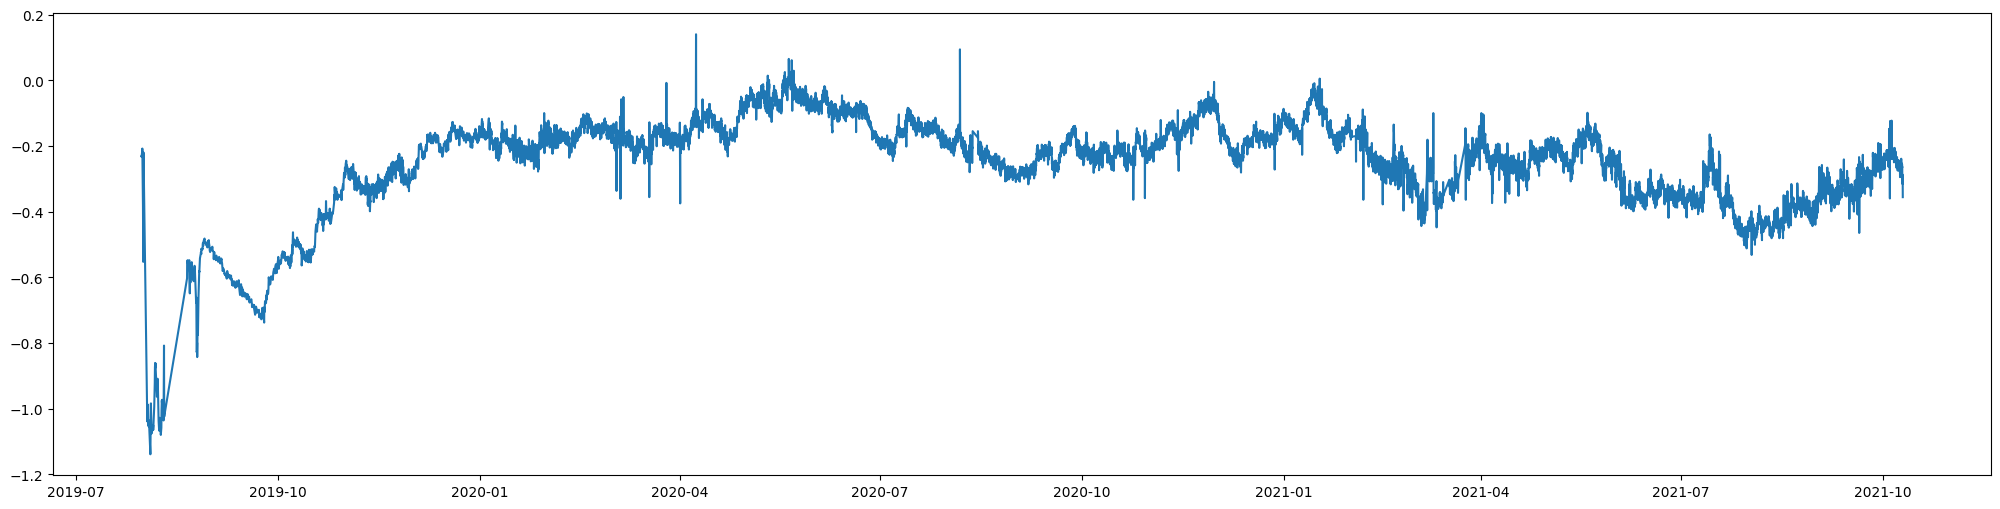

In [6]:
plt.figure(figsize=(25,6))
temp = data
temp = temp.set_index('date')
plt.plot(temp['gwl'])

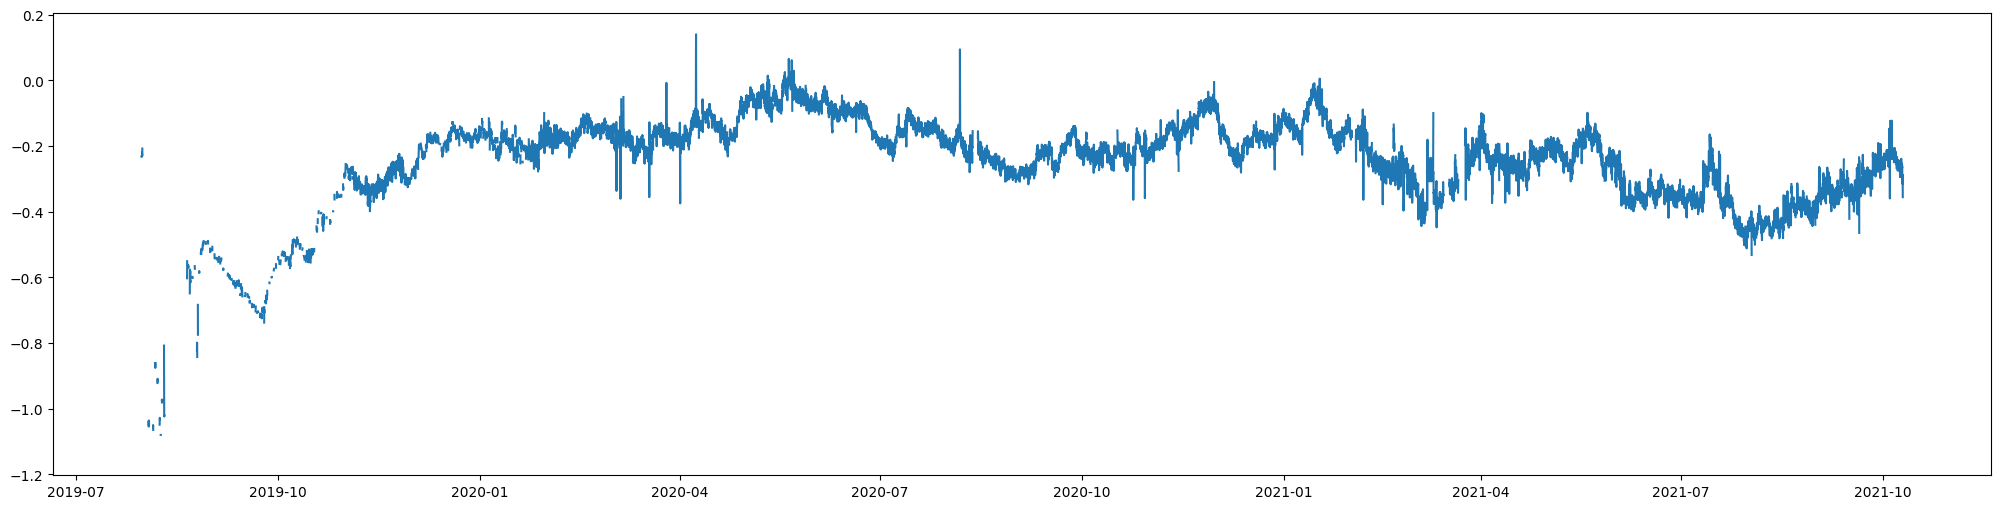

In [8]:
plt.figure(figsize=(25,6))
# temp = temp.asfreq('1H')
plt.plot(temp['gwl'])

In [9]:
temp

,gwl,soil,rain
date,,,
2019-07-30 18:00:00,-0.232,57.440,0.0
2019-07-30 19:00:00,-0.233,57.876,1.8
2019-07-30 20:00:00,NaN,NaN,NaN
2019-07-30 21:00:00,NaN,NaN,NaN
2019-07-30 22:00:00,NaN,NaN,NaN
...,...,...,...
2021-10-09 21:00:00,-0.287,46.070,1.0
2021-10-09 22:00:00,-0.316,45.610,6.6
2021-10-09 23:00:00,-0.310,46.009,3.2


In [10]:
temp.to_pickle('data_1hour_clean.pkl')

In [11]:
pd.read_pickle('data_1hour_clean.pkl')

,gwl,soil,rain
date,,,
2019-07-30 18:00:00,-0.232,57.440,0.0
2019-07-30 19:00:00,-0.233,57.876,1.8
2019-07-30 20:00:00,NaN,NaN,NaN
2019-07-30 21:00:00,NaN,NaN,NaN
2019-07-30 22:00:00,NaN,NaN,NaN
...,...,...,...
2021-10-09 21:00:00,-0.287,46.070,1.0
2021-10-09 22:00:00,-0.316,45.610,6.6
2021-10-09 23:00:00,-0.310,46.009,3.2


## Anomaly Detection

In [ ]:
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

In [ ]:
df_fb = data.drop(['rain', 'soil'], axis=1)
df_fb.rename(columns={'date':'ds', 'gwl':'y'}, inplace=True)
df_fb

,ds,y
0,2019-07-30 18:00:00,-0.232
1,2019-07-30 19:00:00,-0.233
2,2019-07-31 01:00:00,-0.221
3,2019-07-31 02:00:00,-0.230
4,2019-07-31 03:00:00,-0.231
...,...,...
15973,2021-10-09 21:00:00,-0.287
15974,2021-10-09 22:00:00,-0.316
15975,2021-10-09 23:00:00,-0.310
15976,2021-10-10 00:00:00,-0.304


23:33:45 - cmdstanpy - INFO - Chain [1] start processing
23:34:09 - cmdstanpy - INFO - Chain [1] done processing


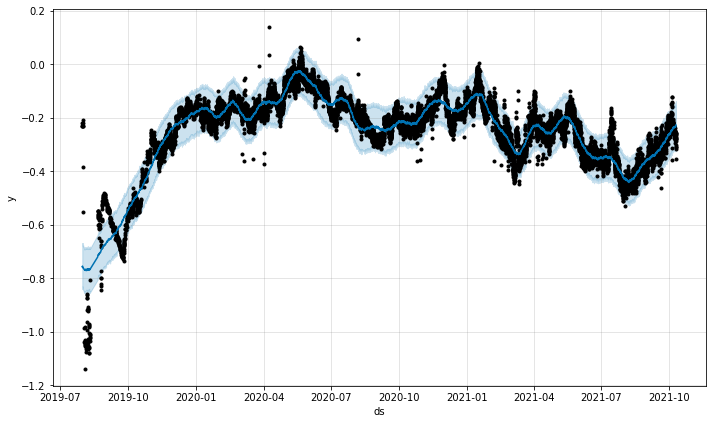

In [ ]:
model_fb = Prophet(interval_width=0.95)
model_fb.fit(df_fb)

forecast = model_fb.predict(df_fb)
model_fb.plot(forecast);

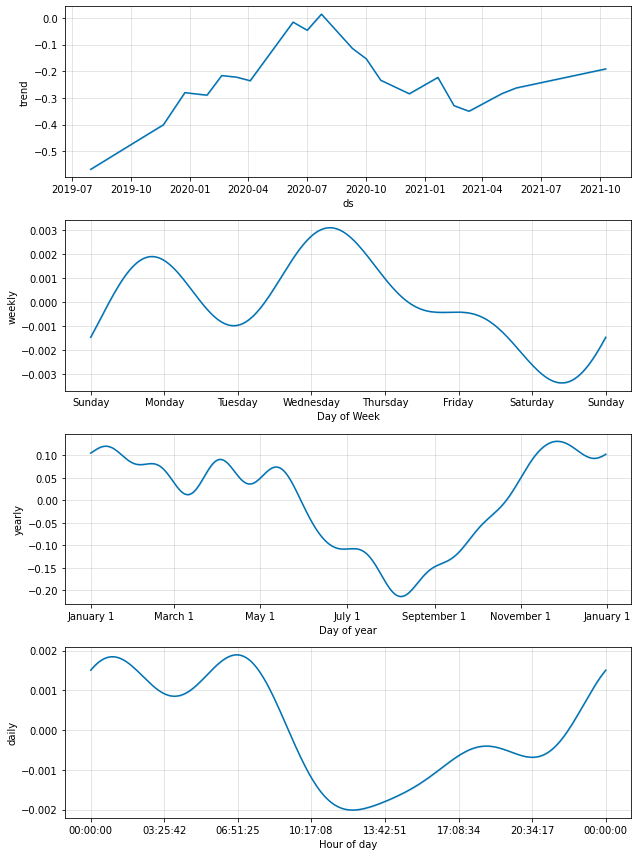

In [ ]:
model_fb.plot_components(forecast);

In [ ]:
# Merge actual and predicted values
performance = pd.merge(df_fb, forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']], on='ds')

# Check MAE value
performance_MAE = mean_absolute_error(performance['y'], performance['yhat'])
print(f'The MAE for the model is {performance_MAE}')

# Check MAPE value
performance_MAPE = mean_absolute_percentage_error(performance['y'], performance['yhat'])
print(f'The MAPE for the model is {performance_MAPE}')

The MAE for the model is 0.029876689102024595
The MAPE for the model is 32931714274.56778


In [ ]:
# Create an anomaly indicator
performance['anomaly'] = performance.apply(lambda rows: 1 if ((rows.y<rows.yhat_lower)|(rows.y>rows.yhat_upper)) else 0, axis = 1)

# Check the number of anomalies
performance['anomaly'].value_counts()

0    15380
1      598
Name: anomaly, dtype: int64

In [ ]:
performance

,ds,y,yhat,yhat_lower,yhat_upper,anomaly
0,2019-07-30 18:00:00,-0.232,-0.757927,-0.840921,-0.676407,1
1,2019-07-30 19:00:00,-0.233,-0.757884,-0.840539,-0.669278,1
2,2019-07-31 01:00:00,-0.221,-0.755509,-0.834895,-0.674252,1
3,2019-07-31 02:00:00,-0.230,-0.755820,-0.831599,-0.672443,1
4,2019-07-31 03:00:00,-0.231,-0.756387,-0.835115,-0.676794,1
...,...,...,...,...,...,...
15973,2021-10-09 21:00:00,-0.287,-0.232097,-0.314639,-0.143371,0
15974,2021-10-09 22:00:00,-0.316,-0.231295,-0.310509,-0.147774,1
15975,2021-10-09 23:00:00,-0.310,-0.230072,-0.320221,-0.149265,0
15976,2021-10-10 00:00:00,-0.304,-0.228863,-0.313775,-0.138726,0


<AxesSubplot:xlabel='ds', ylabel='y'>

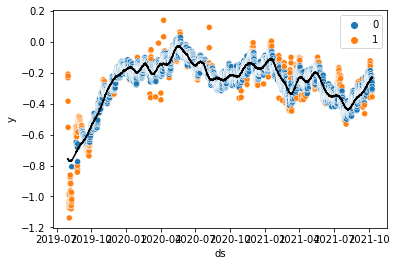

In [ ]:
sns.scatterplot(x='ds', y='y', data=performance, hue='anomaly')
sns.lineplot(x='ds', y='yhat', data=performance, color='black')

In [ ]:
from prophet.serialize import model_to_json, model_from_json

with open('serialized_model.json', 'w') as fout:
    fout.write(model_to_json(model_fb))  # Save model

## Anomaly Removal

In [ ]:
data['gwl'].mask(performance['anomaly']==1, np.nan, inplace=True)
data

,date,gwl,soil,rain
0,2019-07-30 18:00:00,NaN,57.440,0.0
1,2019-07-30 19:00:00,NaN,57.876,1.8
2,2019-07-31 01:00:00,NaN,57.535,0.2
3,2019-07-31 02:00:00,NaN,56.881,0.2
4,2019-07-31 03:00:00,NaN,56.277,0.0
...,...,...,...,...
15973,2021-10-09 21:00:00,-0.287,46.070,1.0
15974,2021-10-09 22:00:00,NaN,45.610,6.6
15975,2021-10-09 23:00:00,-0.310,46.009,3.2
15976,2021-10-10 00:00:00,-0.304,46.285,2.8


In [ ]:
data['gwl'].isna().sum()

598

,date,gwl,soil,rain
0,2019-07-30 18:00:00,NaN,57.440,0.0
1,2019-07-30 19:00:00,NaN,57.876,1.8
2,2019-07-31 01:00:00,NaN,57.535,0.2
3,2019-07-31 02:00:00,NaN,56.881,0.2
4,2019-07-31 03:00:00,NaN,56.277,0.0
...,...,...,...,...
95,2019-08-26 10:00:00,NaN,29.013,0.4
96,2019-08-26 19:00:00,NaN,30.096,22.0
97,2019-08-26 20:00:00,NaN,29.986,2.6
98,2019-08-27 01:00:00,NaN,29.924,15.2


In [ ]:
data.to_pickle('rimba_panjang_missing_2.pkl')

In [ ]:
data.set_index('date', inplace=True)
data = data.asfreq('1H')

In [ ]:
data

,gwl,soil,rain
date,,,
2019-07-30 18:00:00,NaN,57.440,0.0
2019-07-30 19:00:00,NaN,57.876,1.8
2019-07-30 20:00:00,NaN,NaN,NaN
2019-07-30 21:00:00,NaN,NaN,NaN
2019-07-30 22:00:00,NaN,NaN,NaN
...,...,...,...
2021-10-09 21:00:00,-0.287,46.070,1.0
2021-10-09 22:00:00,NaN,45.610,6.6
2021-10-09 23:00:00,-0.310,46.009,3.2


In [ ]:
data.to_pickle('rimba_panjang_missing_3.pkl')

## Imputation

In [ ]:
from sklearn.impute import KNNImputer

impute = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
knn_impute = impute.fit_transform(data)

knn = pd.DataFrame(knn_impute, columns=['gwl', 'soil', 'rain'], index=data.index)
knn

,gwl,soil,rain
date,,,
2019-07-30 18:00:00,-0.168600,57.440000,0.000000
2019-07-30 19:00:00,-0.120600,57.876000,1.800000
2019-07-30 20:00:00,-0.227323,46.198176,22.254331
2019-07-30 21:00:00,-0.227323,46.198176,22.254331
2019-07-30 22:00:00,-0.227323,46.198176,22.254331
...,...,...,...
2021-10-09 21:00:00,-0.287000,46.070000,1.000000
2021-10-09 22:00:00,-0.245800,45.610000,6.600000
2021-10-09 23:00:00,-0.310000,46.009000,3.200000


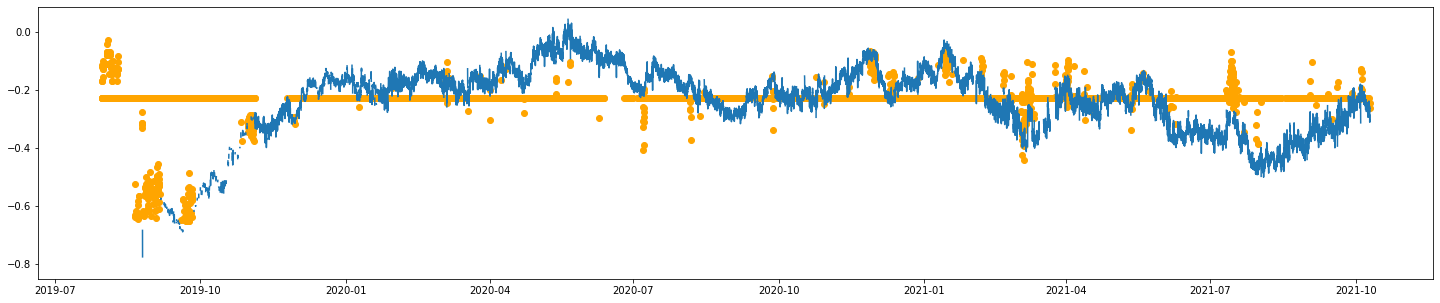

In [ ]:
plt.figure(figsize=(25,5))
plt.plot(data['gwl'])
plt.scatter(data[data['gwl'].isnull()].index, knn.loc[data[data['gwl'].isnull()].index]['gwl'], color='orange')

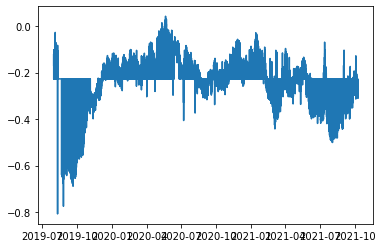

In [ ]:
plt.plot(knn['gwl'])

In [ ]:
data

,date,gwl,soil,rain
0,2019-07-30 18:00:00,-0.232,57.440,0.0
1,2019-07-30 19:00:00,-0.233,57.876,1.8
2,2019-07-31 01:00:00,-0.221,57.535,0.2
3,2019-07-31 02:00:00,-0.230,56.881,0.2
4,2019-07-31 03:00:00,-0.231,56.277,0.0
...,...,...,...,...
15973,2021-10-09 21:00:00,-0.287,46.070,1.0
15974,2021-10-09 22:00:00,-0.316,45.610,6.6
15975,2021-10-09 23:00:00,-0.310,46.009,3.2
15976,2021-10-10 00:00:00,-0.304,46.285,2.8


In [ ]:
test_data = data
test_data = test_data.set_index('date')

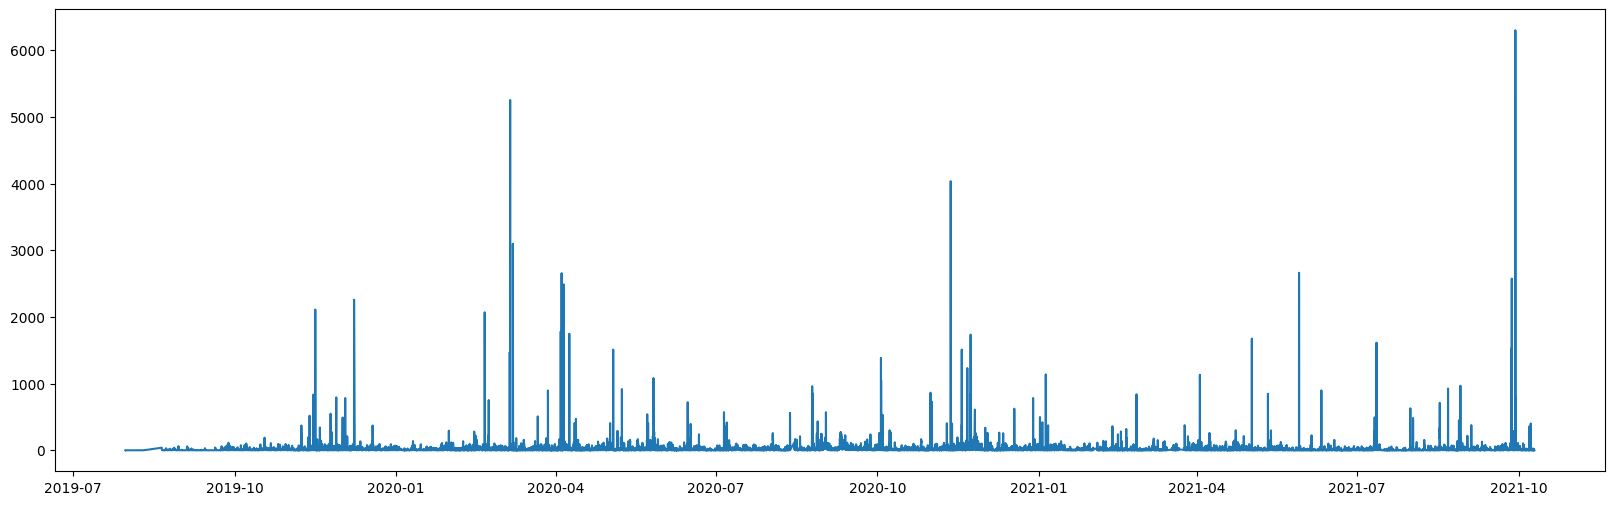

In [ ]:
plt.figure(figsize=(20,6))
plt.plot(test_data['rain'])

In [ ]:
data2 = pd.read_pickle("rimba_panjang_missing_3.pkl")
data2

,gwl,soil,rain
date,,,
2019-07-30 18:00:00,NaN,57.440,0.0
2019-07-30 19:00:00,NaN,57.876,1.8
2019-07-30 20:00:00,NaN,NaN,NaN
2019-07-30 21:00:00,NaN,NaN,NaN
2019-07-30 22:00:00,NaN,NaN,NaN
...,...,...,...
2021-10-09 21:00:00,-0.287,46.070,1.0
2021-10-09 22:00:00,NaN,45.610,6.6
2021-10-09 23:00:00,-0.310,46.009,3.2


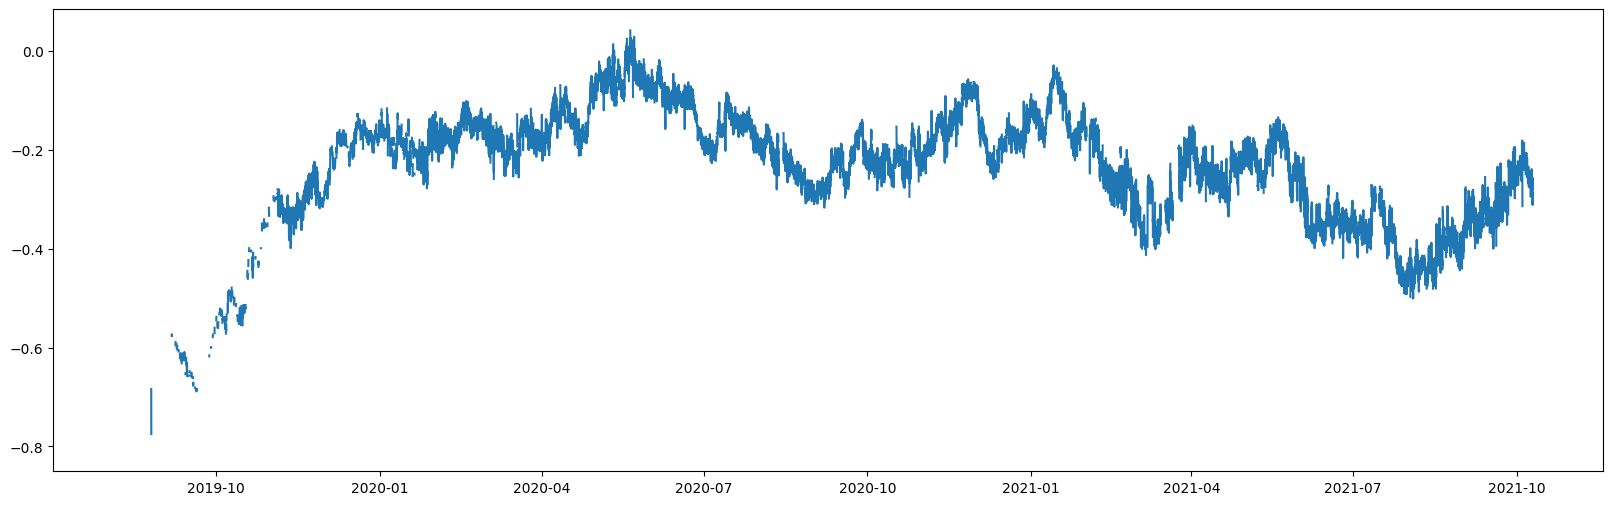

In [ ]:
plt.figure(figsize=(20,6))
plt.plot(data2['gwl'])

In [ ]:
impute_stine = pd.read_pickle('impute/impute_stine.pkl')
impute_spline = pd.read_pickle('impute/impute_spline.pkl')
impute_linear = pd.read_pickle('impute/impute_linear.pkl')
impute_nocb = pd.read_pickle('impute/impute_nocb.pkl')
impute_locf = pd.read_pickle('impute/impute_locf.pkl')
impute_simple25 = pd.read_pickle('impute/impute_simple25.pkl')
impute_linear25 = pd.read_pickle('impute/impute_linear25.pkl')
impute_exponential25 = pd.read_pickle('impute/impute_exponential25.pkl')



In [ ]:
def fix_format(dataset):
  dataset = dataset.reset_index()
  dataset['index'] = pd.to_datetime(dataset['index'])
  dataset = dataset.set_index('index')
  dataset = dataset[['gwl', 'rain', 'soil']]

  return dataset

In [ ]:

impute_nocb          = fix_format(impute_nocb)
impute_locf          = fix_format(impute_locf)

impute_stine         = fix_format(impute_stine)
impute_spline        = fix_format(impute_spline)
impute_linear        = fix_format(impute_linear)


impute_simple25      = fix_format(impute_simple25)
impute_linear25      = fix_format(impute_linear25)
impute_exponential25 = fix_format(impute_exponential25)

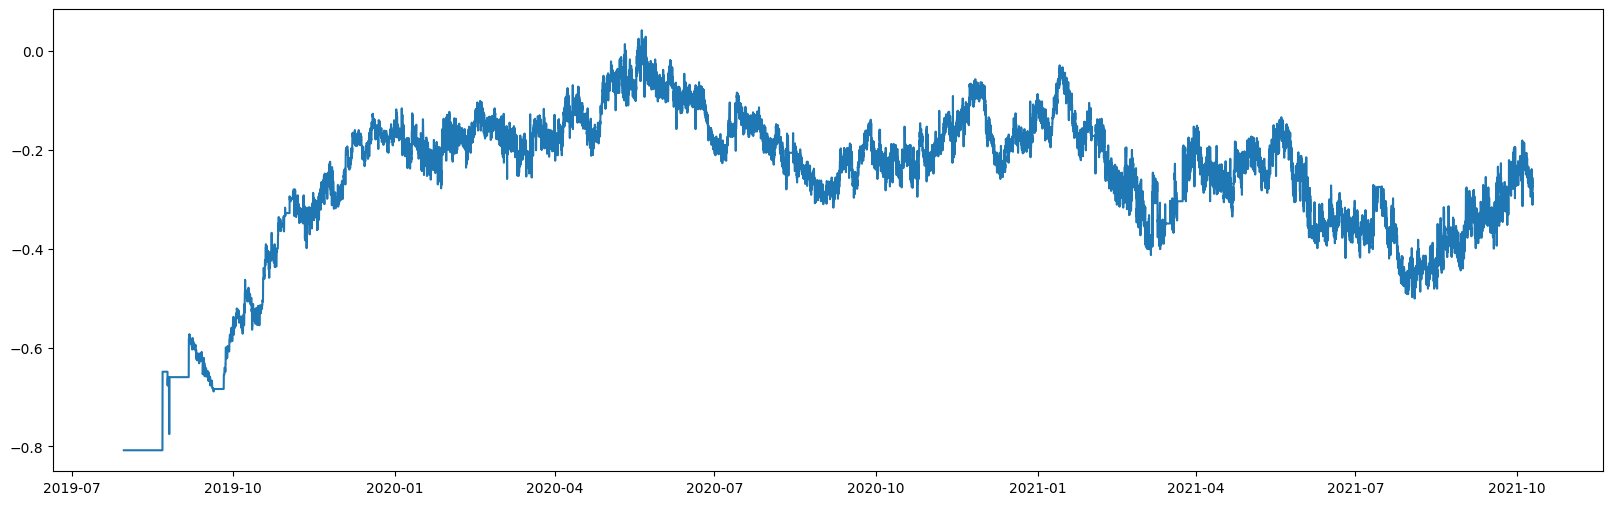

In [ ]:
plt.figure(figsize=(20,6))
plt.plot(impute_locf['gwl'])